# Introduction

On the second track of this capstone project, the data analystic is working on the marketiung team at the high-tech manufacturer company Bellabeat. The cofounder and Chief Creative Officer, Urška Sršen, requires the analyst to analyze srmat device fitness data to help find new growth oportunities for the copany. The analyst should focus on one of the preoducts offered by Bellabeat and analyse smart device data to gain insights into consumer's usage of their sart devices. The insights generated by this analysis will be presented to the marketinbg team in order to help them create new campaigns and merketing strategies for the company.

* **Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

* **Leaf:** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

* **Time:** This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

* **Spring:** This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

* **Bellabeat membership:** Bellabeat also offers a subscription-based membership program for users.Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

# Ask phase

In this phase, we were asked to keep a few question in mind before performing the analysis.

**Questions:**
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

While those questions can't be answered with the data alone, they offer a guideline for external research to further enrich the analysis and the recomendations in the final phase of this project.

**Producing a report with the following deliverables:**
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

**The Business Task:** Search for patterns on the usage of smart fitness devices and to generate insights that can guide marketing strategies in the future.

**The Data Source:** The data is collected by a third party, where users of the Fitbit device were selected and consented to submit their personal tracker data.

**The Stake holders:** Urška Sršen (Bellabeat’s cofounder and Chief Creative Officer), Sando Mur(Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team) and fellow ebers of the Bellabeat marketing analytics team.

# Prepare

In this phase I checked the data available in the dataset and organized it on dataframes using **pandas**. Pandas is a free pyhton librabry for data manipulation and data analysis. You can check more about the pandas library about it [here](http://pandas.pydata.org/).
I also imported other python libraries: 
* **numpy** that allowed me to use large arrays and matrices as well mathematical functions to operate on those arrays;
* **datetime** that allowed me to perform changes and manipulation of date and time data.
* **matplotlib** and **seaborn** that are the python libraries most used to creat great visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

I first took a glance at each csv file: To do that I used the pandas function read_csv(), that can import those csv files into pandas dataframes, so I could check the rows and collumns. Every csv file was assign to the name of a variable, named in lower case and spaced using underscores ("_"). Notice that narrow datasets were not included since their data was too skewed for us to make use of it.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

In [3]:
daily_intensities = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_calories = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_steps = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_activity = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minute_calories = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
minute_intensities = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
minute_sleep = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
minute_steps = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
minute_mets = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
weight_log = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
sleep_day = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heartrate = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

I can gather a small summary of the datasets (or dataframes) using pandas **info()** function:


In [4]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In order to check each dataset without copying and pasting each one manually, I wrote a list with the name of each variable and ran each of them through a function that counts for unique values.

Checking for unique values means I can see how many different people are included in each dataset.

In [5]:
bellabeat_di = {"daily_intensities": daily_intensities, "daily_calories": daily_calories, "daily_steps": daily_steps, "daily_activity": daily_activity, "hourly_calories": hourly_calories, "hourly_intensities":hourly_intensities, "hourly_steps":hourly_steps, "minute_calories":minute_calories, "minute_intensities":minute_intensities, "minute_sleep":minute_sleep, "minute_steps":minute_steps, "minute_mets":minute_mets, "weight_log":weight_log, "sleep_day":sleep_day, "heartrate":heartrate}

def count_uniq(arg):
    for key, valor in arg.items():
        count = valor["Id"].nunique()
        print(key,count, sep=": ")

In [6]:
count_uniq(bellabeat_di)

daily_intensities: 33
daily_calories: 33
daily_steps: 33
daily_activity: 33
hourly_calories: 33
hourly_intensities: 33
hourly_steps: 33
minute_calories: 33
minute_intensities: 33
minute_sleep: 24
minute_steps: 33
minute_mets: 33
weight_log: 8
sleep_day: 24
heartrate: 14


As we can see in the list above, the datasets **weight log** has to few participants in order to perform any good unbiased analysis. So we will drop it.

Next we will check how many null or missing values each of the datasets have. We will use a custom fucntion for checking it, just as before.

In [7]:
def count_null(arg):
    for key, valor in arg.items():
        count = valor.isnull().values.sum()
        print(key,count, sep=": ")

In [8]:
count_null(bellabeat_di)

daily_intensities: 0
daily_calories: 0
daily_steps: 0
daily_activity: 0
hourly_calories: 0
hourly_intensities: 0
hourly_steps: 0
minute_calories: 0
minute_intensities: 0
minute_sleep: 0
minute_steps: 0
minute_mets: 0
weight_log: 65
sleep_day: 0
heartrate: 0


# Process

The first thing I noticed in the **prepare phase** was the uppercasing in the column names. Since python is case-sensitive we need to change all column names to lowercase. We can do it by using the rename() function.


In [9]:
daily_intensities = daily_intensities.rename(columns=str.lower)
daily_calories = daily_calories.rename(columns=str.lower)
daily_steps = daily_steps.rename(columns=str.lower)
daily_activity = daily_activity.rename(columns=str.lower)
hourly_calories = hourly_calories.rename(columns=str.lower)
hourly_intensities = hourly_intensities.rename(columns=str.lower)
hourly_steps = hourly_steps.rename(columns=str.lower)
minute_calories = minute_calories.rename(columns=str.lower)
minute_intensities = minute_intensities.rename(columns=str.lower)
minute_sleep = minute_sleep.rename(columns=str.lower)
minute_steps = minute_steps.rename(columns=str.lower)
minute_mets = minute_mets.rename(columns=str.lower)
sleep_day = sleep_day.rename(columns=str.lower)
heartrate = heartrate.rename(columns=str.lower)

Next I noticed that every dataframe had their date different from the international format YYYY-MM-DD. So the next step in cleaning the data was changing the data format in each dataframe using the to_datime and dt.strtime('%Y-%m-%d'). However, two data frames were very time consuming to perform the change: minute_mets and heartrate.

In [10]:
daily_intensities["activityday"] = pd.to_datetime(daily_intensities["activityday"]).dt.strftime('%Y-%m-%d')
daily_calories["activityday"] = pd.to_datetime(daily_calories["activityday"]).dt.strftime('%Y-%m-%d')
daily_steps["activityday"] = pd.to_datetime(daily_steps["activityday"]).dt.strftime('%Y-%m-%d')
daily_activity["activitydate"] = pd.to_datetime(daily_activity["activitydate"]).dt.strftime('%Y-%m-%d')
sleep_day["sleepday"] = pd.to_datetime(sleep_day["sleepday"]).dt.strftime('%Y-%m-%d')

Next, in order to merge and aggregate the daily data, I need to formate the name of the columns cointaing the dates.
At this point the same cannot be performed in th hourly and minute data, since they have time and date in the same collumn.

In [11]:
daily_intensities.rename(columns={'activityday':'date'}, inplace=True)
daily_calories.rename(columns={'activityday':'date'}, inplace=True)
daily_steps.rename(columns={'activityday':'date'}, inplace=True)
daily_activity.rename(columns={'activitydate':'date'}, inplace=True)
sleep_day.rename(columns={'sleepday':'date'}, inplace=True)

# I also had to format back the new date column to the datetime data type
daily_intensities["date"] = pd.to_datetime(daily_intensities["date"])
daily_calories["date"] = pd.to_datetime(daily_calories["date"])
daily_steps["date"] = pd.to_datetime(daily_steps["date"])
daily_activity["date"] = pd.to_datetime(daily_activity["date"])
sleep_day["date"] = pd.to_datetime(sleep_day["date"])

In [12]:
daily_intensities["weekday"] = daily_intensities["date"].dt.day_name()
daily_calories["weekday"] = daily_calories["date"].dt.day_name()
daily_steps["weekday"] = daily_steps["date"].dt.day_name()
daily_activity["weekday"] = daily_activity["date"].dt.day_name()
sleep_day["weekday"] = sleep_day["date"].dt.day_name()

Regarding the **hourly datasets**, some formating was necessary in order to extract some insights from the dataframes: both the date and the time were compiled in the same column, so we found it was best to split them into 2 columns, one for data and another for hour. That was achieved with the **split()** function, where we chose a delimeter(in this case the space between the date and the time stamp.

In [13]:
hourly_intensities[['date','hour']] = hourly_intensities.activityhour.str.split(' ',1,expand=True)
hourly_calories[['date','hour']] = hourly_calories.activityhour.str.split(' ',1,expand=True)
hourly_steps[['date','hour']] = hourly_steps.activityhour.str.split(' ',1,expand=True)

After the split, we formatted the **date** and **hour** columns to the international format(YYYY-MM-DD & HH:MM:SS in the 24H format).

In [14]:
hourly_intensities["date"] = pd.to_datetime(hourly_intensities["date"]).dt.strftime('%Y-%m-%d')
hourly_calories["date"] = pd.to_datetime(hourly_calories["date"]).dt.strftime('%Y-%m-%d')
hourly_steps["date"] = pd.to_datetime(hourly_steps["date"]).dt.strftime('%Y-%m-%d')
hourly_intensities['hour'] = pd.to_datetime(hourly_intensities['hour'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')
hourly_calories['hour'] = pd.to_datetime(hourly_calories['hour'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')
hourly_steps['hour'] = pd.to_datetime(hourly_steps['hour'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')

In [15]:
# I also had to format back the new date column to the datetime data type
hourly_intensities["date"] = pd.to_datetime(hourly_intensities["date"])
hourly_calories["date"] = pd.to_datetime(hourly_calories["date"])
hourly_steps["date"] = pd.to_datetime(hourly_steps["date"])

hourly_intensities["weekday"] = hourly_intensities["date"].dt.day_name()
hourly_calories["weekday"] = hourly_calories["date"].dt.day_name()
hourly_steps["weekday"] = hourly_steps["date"].dt.day_name()

# Analyze

Initially, I got the avarege, minimum and maximum of each columns on the daily datasets to have a better picture of the bellabeats users profile. I performed this throught the useof the the **describe()** function.

In [16]:
daily_intensities.describe()

,id,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,sedentaryactivedistance,lightactivedistance,moderatelyactivedistance,veryactivedistance
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681
std,2.424805e+09,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000
50%,4.445115e+09,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000
75%,6.962181e+09,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500
max,8.877689e+09,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000


In [17]:
daily_activity.describe()

,id,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


Since the **daily_activity** data frame include **daily_intensities** and more data, so I will drop the latter.

Looks like the avarage user of the FitBit app falls in the light active category, spending around 192 minutes of workout,walking an avarage of 5km per day and 7600 steps. The user spends around 2300 calories, wich is, according to the U.S. Departament of Health, between the daily avarage (1600-2300 cal) calories spent by an adult woman, as well as the daily avarage (2000-3000 cal) calories spent by an adult male.

<AxesSubplot:xlabel='trackerdistance', ylabel='Count'>

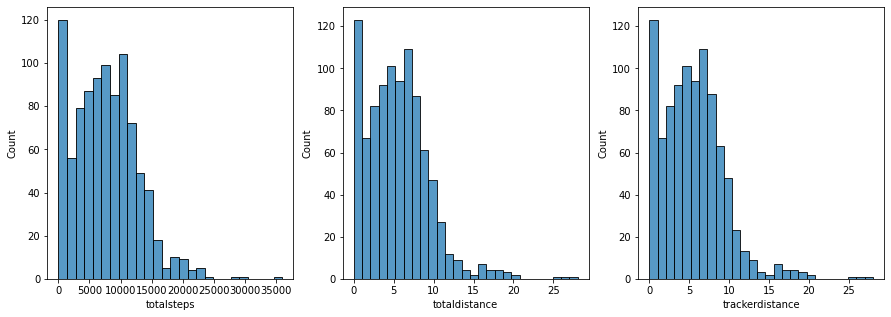

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(x='totalsteps',data=daily_activity, ax=axes[0])
sns.histplot(x='totaldistance',data=daily_activity, ax=axes[1])
sns.histplot(x='trackerdistance',data=daily_activity, ax=axes[2])

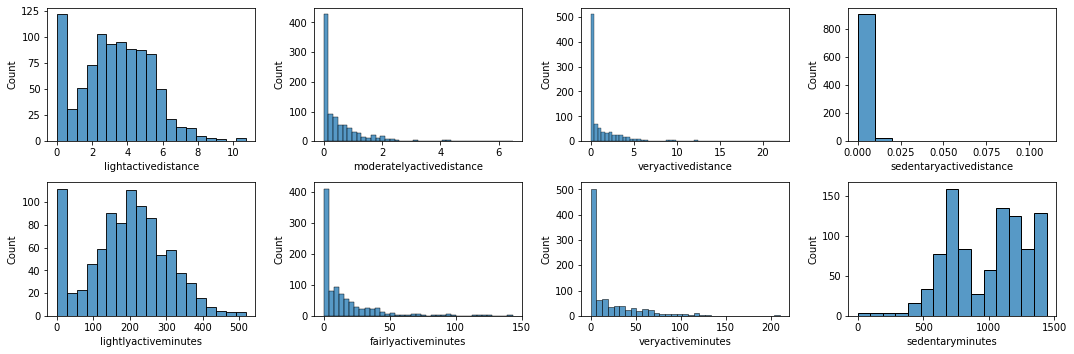

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))

sns.histplot(x='lightactivedistance',data=daily_activity, ax=axes[0,0])
sns.histplot(x='moderatelyactivedistance',data=daily_activity, ax=axes[0,1])
sns.histplot(x='veryactivedistance',data=daily_activity, ax=axes[0,2])
sns.histplot(x='sedentaryactivedistance',data=daily_activity, ax=axes[0,3])

sns.histplot(x='lightlyactiveminutes',data=daily_activity, ax=axes[1,0])
sns.histplot(x='fairlyactiveminutes',data=daily_activity, ax=axes[1,1])
sns.histplot(x='veryactiveminutes',data=daily_activity, ax=axes[1,2])
sns.histplot(x='sedentaryminutes',data=daily_activity, ax=axes[1,3])

fig.tight_layout(pad=1)

In [20]:
daily_calories.describe()

,id,calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


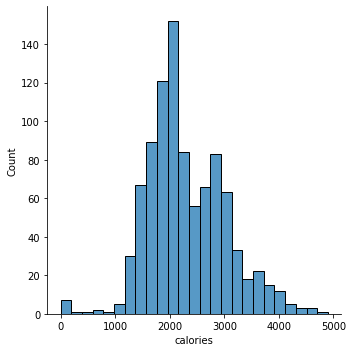

In [21]:
sns.displot(daily_calories,x='calories')

Next we explored the sleep routine of the users of the BellaBeat app. Again, using first the **describe()** function.

In [22]:
sleep_day.describe()

,id,totalsleeprecords,totalminutesasleep,totaltimeinbed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [23]:
sleep_day['timenotsleeping']=sleep_day['totaltimeinbed']-sleep_day['totalminutesasleep']
sleep_day.describe()

,id,totalsleeprecords,totalminutesasleep,totaltimeinbed,timenotsleeping
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225,39.171913
std,2.060360e+09,0.345521,118.344679,127.101607,46.570095
min,1.503960e+09,1.000000,58.000000,61.000000,0.000000
25%,3.977334e+09,1.000000,361.000000,403.000000,17.000000
50%,4.702922e+09,1.000000,433.000000,463.000000,25.000000
75%,6.962181e+09,1.000000,490.000000,526.000000,40.000000
max,8.792010e+09,3.000000,796.000000,961.000000,371.000000


The avarage user of the app spends roughly **7 hours sleeping** and **39 minutes in bed not sleeping.**

<AxesSubplot:xlabel='timenotsleeping', ylabel='Count'>

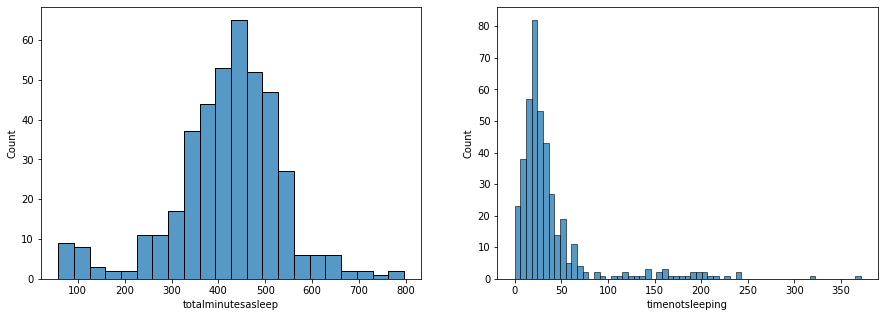

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(sleep_day,x='totalminutesasleep', ax=axes[0])
sns.histplot(sleep_day,x='timenotsleeping', ax=axes[1])

The next step in our analysis was to search for correlations between activity and sleep datasets. We serached for correlation using the **corr()** function in pandas and the seaborn library to create a **heatmap**. The correlation between variables are represented be different intesnities of blue. Light blue and white colors represent a high correlation, while dark blue colors represent lower correlations.


<AxesSubplot:>

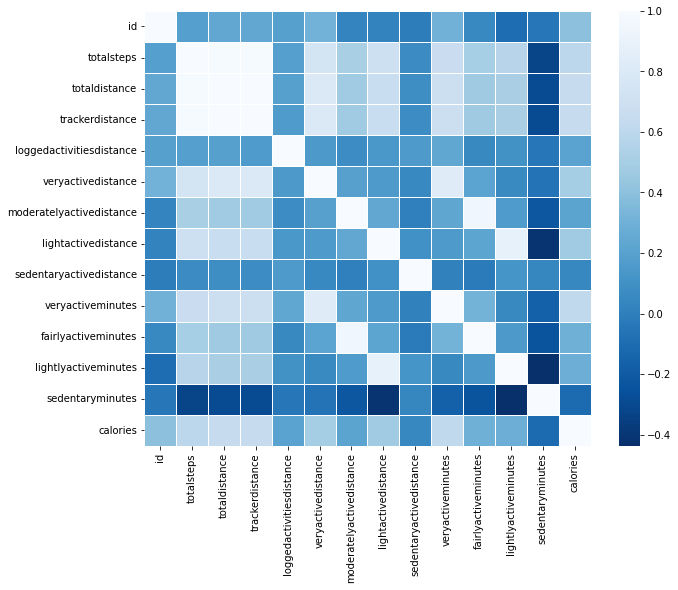

In [25]:
plt.figure(figsize=(10,8), clear=True)

day_actv_corr=daily_activity.corr(method='pearson')
sns.heatmap(day_actv_corr,cmap="Blues_r", linewidths=1)

Basically, there isn't anything unusal or noteworthy when exploring the correlation of variables from the daily activity dataset alone: daily total steps and total distance correlates **positevly** with the more active the user was in the day, specially for the **fairly active** and **very active**; there is also a **negative correlation** between sedentary activeties and daily total distance.

<AxesSubplot:xlabel='totaldistance', ylabel='veryactiveminutes'>

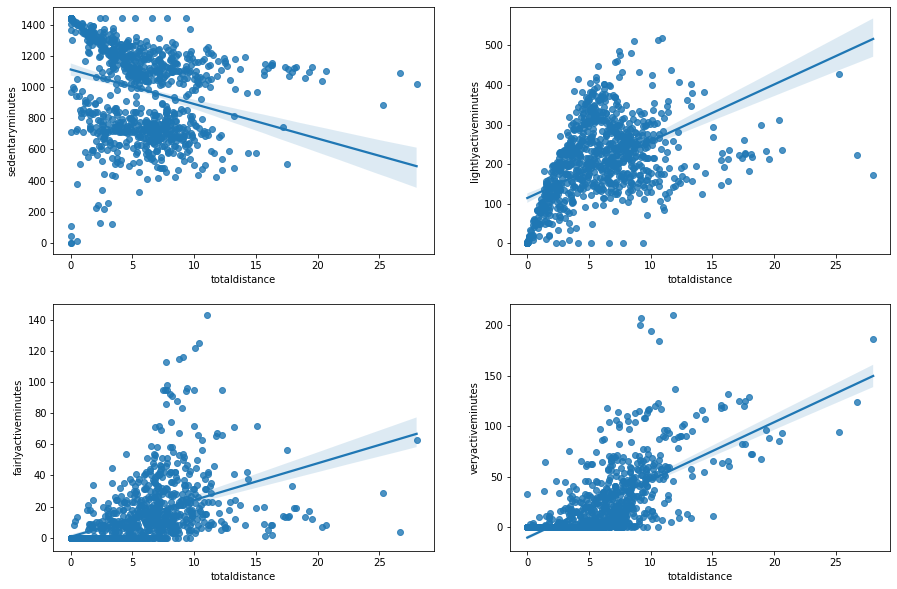

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.regplot(data=daily_activity, x='totaldistance', y='sedentaryminutes',ax=axes[0,0])
sns.regplot(data=daily_activity, x='totaldistance', y='lightlyactiveminutes', ax=axes[0,1])
sns.regplot(data=daily_activity, x='totaldistance', y='fairlyactiveminutes',ax=axes[1,0])
sns.regplot(data=daily_activity, x='totaldistance', y='veryactiveminutes', ax=axes[1,1])

Since there is no really interesting correlation on the daily activity dataset alone, let's merge it with the sleep day dataset and the search for corelation between the variables of both datasets, like before.

In [27]:
act_sleep_merge = pd.merge(daily_activity,sleep_day,how='inner', on=['id','date'])

<AxesSubplot:>

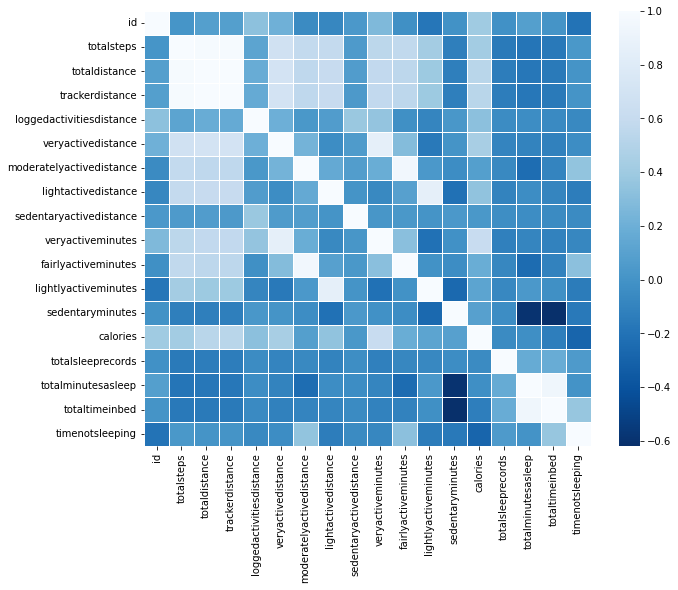

In [28]:
plt.figure(figsize=(10,8), clear=True)

act_sleep_merge_corr=act_sleep_merge.corr(method='pearson')
sns.heatmap(act_sleep_merge_corr,cmap="Blues_r", linewidths=1)

The only noteworthy correlation in the heatmap is the **inverse** (or negative) correlation between the sedentary minutes and the time spent sleeping. So in a way, we can infer that the more time the user spent not workingout, the lesser time was spent sleeping. But it's important to mention that this claim is based on *correlation* and not *causation*.

<AxesSubplot:xlabel='totalminutesasleep', ylabel='veryactiveminutes'>

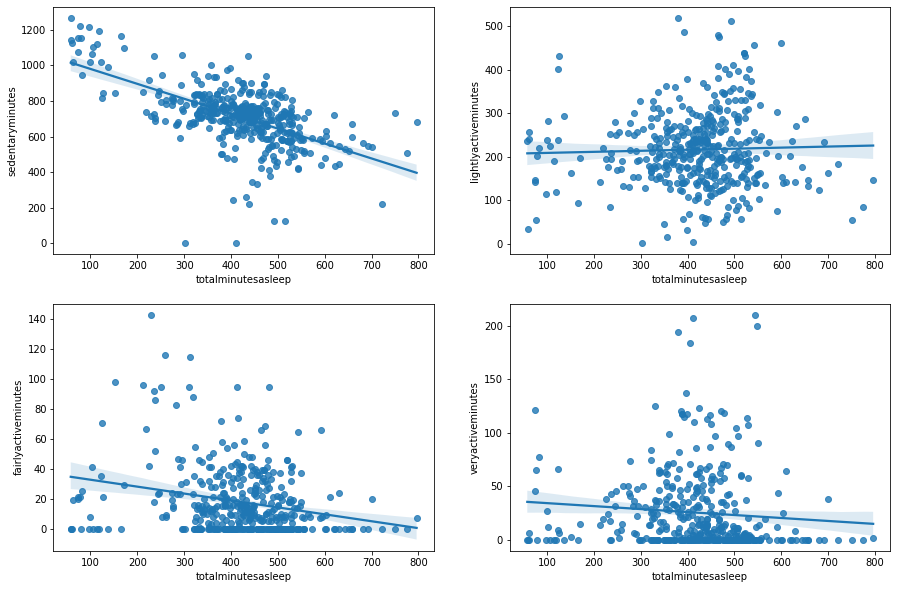

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.regplot(data=act_sleep_merge, x='totalminutesasleep', y='sedentaryminutes',ax=axes[0,0])
sns.regplot(data=act_sleep_merge, x='totalminutesasleep', y='lightlyactiveminutes', ax=axes[0,1])
sns.regplot(data=act_sleep_merge, x='totalminutesasleep', y='fairlyactiveminutes',ax=axes[1,0])
sns.regplot(data=act_sleep_merge, x='totalminutesasleep', y='veryactiveminutes', ax=axes[1,1])

I further explored the correlation between **calories** and **total steps**, as well as **calories** and **total distance**, since it seems intuitive that the more the user walks, the more calories he spends during the day.

<AxesSubplot:xlabel='totaldistance', ylabel='calories'>

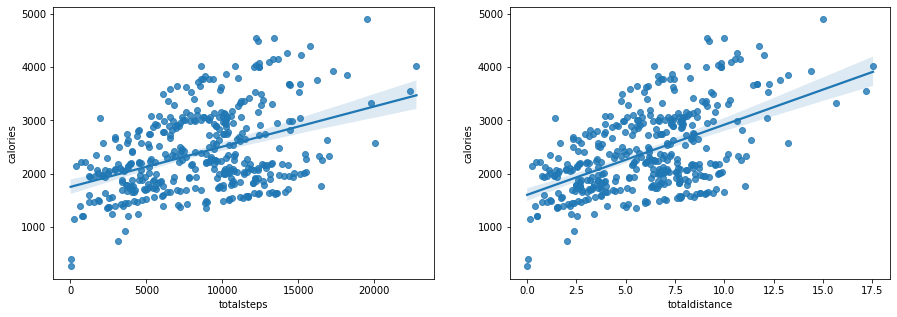

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(data=act_sleep_merge, x='totalsteps', y='calories', ax=axes[0])
sns.regplot(data=act_sleep_merge, x='totaldistance', y='calories', ax=axes[1])

Altought we can see a slight correlation between both **calories X total steps** and **calories X total distanc**e, the correlation factor is less than 0.6, which is considered a moderate positive correlation.

Next I explored the hourly datasets, trying to get a better picture of the time window when the users were the most active.

<AxesSubplot:xlabel='hour', ylabel='averageintensity'>

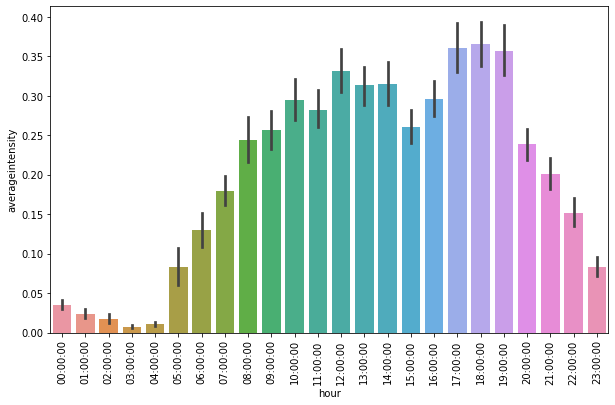

In [31]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(data = hourly_intensities, x="hour", y="averageintensity")

<AxesSubplot:xlabel='hour', ylabel='steptotal'>

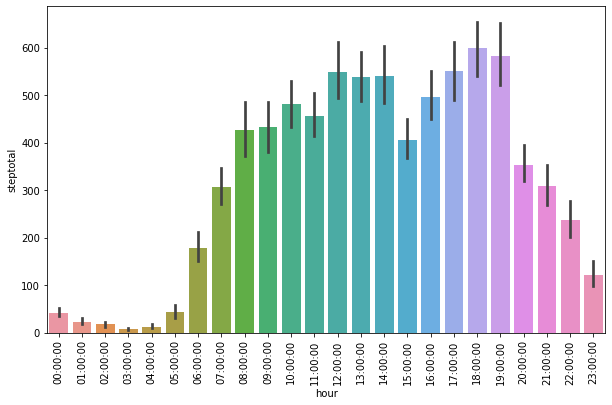

In [32]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(data = hourly_steps, x="hour", y="steptotal")

By analysing both bargraphs, we can infer that the users were more active during **12-14h** and **17-19h**. The first time window was probably due to the lunch hour, while the second one could be a combination of the communion back home or the actual time frame when the user workout.

Next I tried to see any patterns of activity, steps and sleep BUT this time filtering by **day of the week**.

<AxesSubplot:xlabel='weekday', ylabel='averageintensity'>

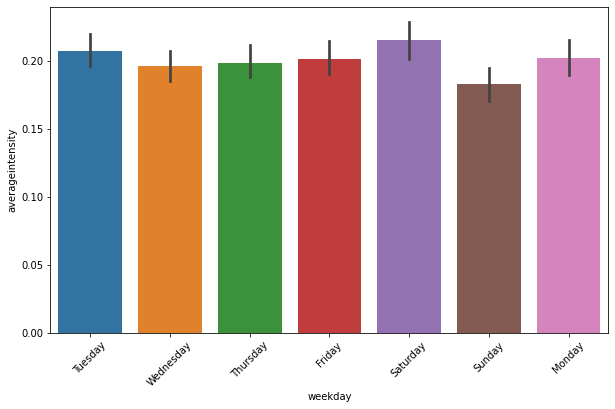

In [33]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(data = hourly_intensities, x="weekday", y="averageintensity")

<AxesSubplot:xlabel='weekday', ylabel='steptotal'>

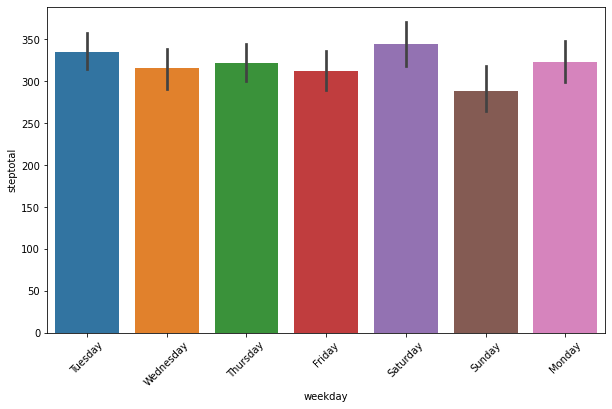

In [34]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(data = hourly_steps, x="weekday", y="steptotal")

<AxesSubplot:xlabel='weekday', ylabel='totalminutesasleep'>

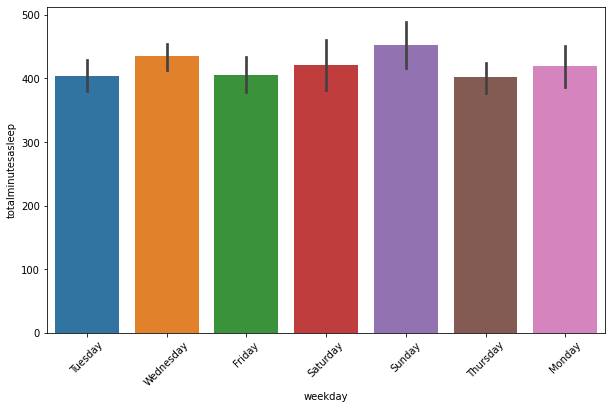

In [35]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(data = sleep_day, x="weekday", y="totalminutesasleep")

Altought there are some diference between the days of the week, the value is so skew that is not even worth to mention it.

# Share

[Disclairmer] *I realize that kaggle's notbook is not the way to go to make a good presentation. But bear with me while I make the keynotes from this project.*

In this study I analyzed third party data collected from users using the fitbit tracker. All 33 users consented to sharing their data so we could gather some insights on the use of smart devices to make data-driven decisions on fitness.

<img src="http://marcas-logos.net/wp-content/uploads/2020/03/Fitbit-Logo-2007.jpg" width="300"><img src="https://www.fitbit.com/global/content/dam/fitbit/global/pdp/devices/charge-5/hero-static/charge5-black-device-3qtr.png" width="200">

The data was composed mainly from their daily activites, how many calories were burned, heartrate, weight log and minutes of sleep.

Altought in theory this data would be great for an complex analysis on the profile of the users, the number users in this survey is too skew to make any accurate predictions, specially in data sets such as weight log and heart rate, where the number of users in less than 20. However, I belive that the remaining data can give a insight in the profile of costumers that use smart devices to track their fitness, as well as some relationship between certain behaviours and helth improvement.

First we need paint a picture of the usual user of smart fitness devices.

In [36]:
profile = pd.DataFrame(act_sleep_merge.filter(['totalsteps','totaldistance','veryactiveminutes','fairlyactiveminutes','lightlyactiveminutes','sedentaryminutes','calories','totalminutesasleep']).mean())
profile.rename( columns={0:'mean'}, inplace=True )
profile

,mean
totalsteps,8541.140436
totaldistance,6.038620
veryactiveminutes,25.188862
fairlyactiveminutes,18.038741
lightlyactiveminutes,216.854722
sedentaryminutes,712.169492
calories,2397.573850
totalminutesasleep,419.467312


Now lets compare the avarage measures of our profile with what we know from scientific leterature and other trusted sources:
* **The avarage user walks 6km and takes 8541 steps per day.** According to an very cited [article](http://ijbnpa.biomedcentral.com/articles/10.1186/1479-5868-8-79) from 2011, published the International Journal of Behaviouraland Physical Activity, claims that a healthy adult takes from 4000-18000 steps a day and a range from 7500-10000 is considered to be somewhat active;
* **The avarage user performs 25 minutes being very active, 18 minutes being fairly active and 216 minutes being lightly active.** The American Heart Association recommends at least [150 minutes](http://www.ahajournals.org/doi/10.1161/circulationaha.109.192703) of moderate exercise per week for adults;
* **The avarage user spends 2397 calories per day.** According to the U.S. Departament of Health, between the daily avarage (1600-2300 cal) calories spent by an adult woman, as well as the daily avarage (2000-3000 cal) calories spent by an adult male;
* **The avarage user spends 7h sleeping each night.** According with American Academy of Sleep Medicine, asults should be sleeping [7 to 9 hours.](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC4442216/).


Next I explored the distribution of users based of the time spent in their activity type(according to intensity).

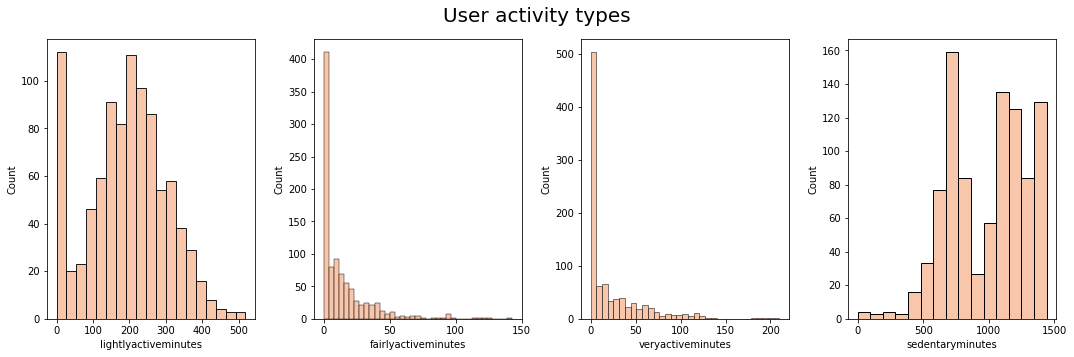

In [37]:
sns.set_palette("rocket_r")

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('User activity types',fontsize=20)

sns.histplot(x='lightlyactiveminutes',data=daily_activity, ax=axes[0])
sns.histplot(x='fairlyactiveminutes',data=daily_activity, ax=axes[1])
sns.histplot(x='veryactiveminutes',data=daily_activity, ax=axes[2])
sns.histplot(x='sedentaryminutes',data=daily_activity, ax=axes[3])

fig.tight_layout(pad=1)

As we can see, the avarage user spends a more time performing light activities, with an avarage 712 minutes (aprox. 11 hours) of sedentary activity, such as resting, working on a desk, eating and sleeping.

Next, I explored the users avarage time spent sleeping and not sleeping (lying on the bed trying to sleep) and poointed out the difference.

In [38]:
sleep_df = pd.DataFrame(sleep_day.filter(['totalminutesasleep','totaltimeinbed','timenotsleeping']).mean())
sleep_df.rename( columns={0:'mean'}, inplace=True )
sleep_df

,mean
totalminutesasleep,419.467312
totaltimeinbed,458.639225
timenotsleeping,39.171913


<AxesSubplot:xlabel='timenotsleeping', ylabel='Count'>

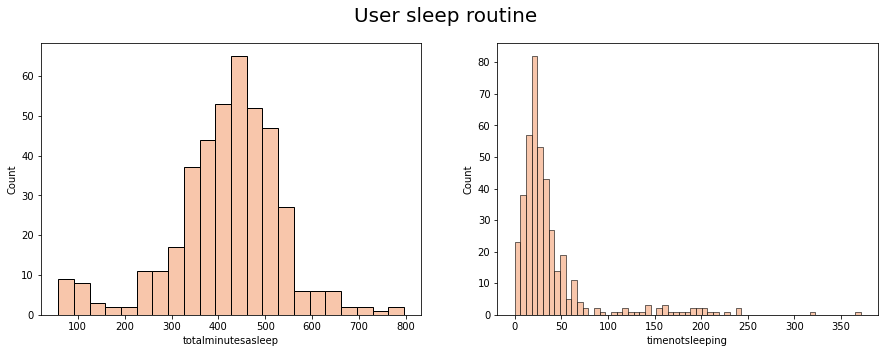

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('User sleep routine',fontsize=20)

sns.histplot(sleep_day,x='totalminutesasleep', ax=axes[0])
sns.histplot(sleep_day,x='timenotsleeping', ax=axes[1])

We can see that altought the avarage user spends a healthy amount of sleep (7h), some substantial ammount of time trying to fall asleep (40min). Naturally the next step was to search for major relationships between physical activity and sleep hours. 

To achieve that I merged the activity dataset and the sleep dataset by user ID. Later, a heatmap was created:

<AxesSubplot:title={'center':'Correlation between variables of merged dataset'}>

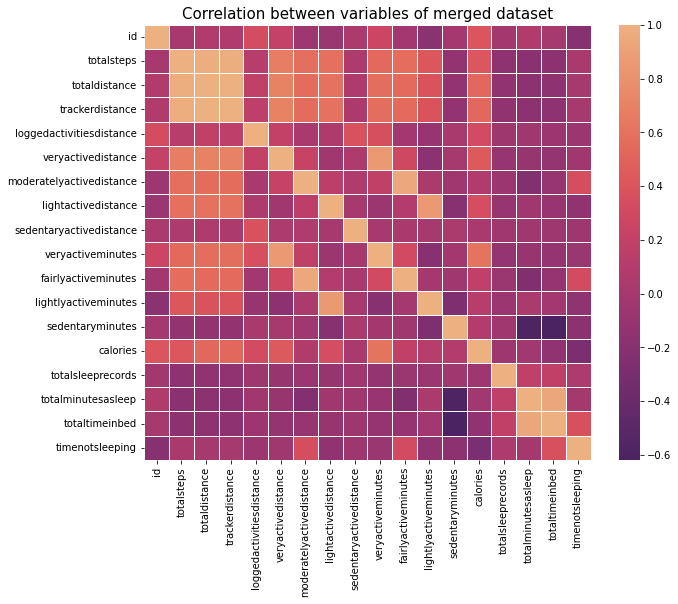

In [40]:
plt.figure(figsize=(10,8), clear=True)
ax=plt.axes()
ax.set_title('Correlation between variables of merged dataset', fontsize=15)

act_sleep_merge_corr=act_sleep_merge.corr(method='pearson')
sns.heatmap(act_sleep_merge_corr,cmap="flare_r", linewidths=1)

The only noteworthy correlation in the heatmap is the **inverse** (or negative) correlation between the **sedentary minutes and the time spent sleeping**. So in a way, we can infer that the more time the user spent not workingout, the lesser time was spent sleeping. But it's important to mention that this claim is based on correlation and not causation.

While exploring further the relationship between sleep and sedentary activity during the day, we noticed that altought there is a lesser time sleeping when the user spends more time being sedentary, there is no noteworthy increase in time trying to sleeping.

<AxesSubplot:xlabel='timenotsleeping', ylabel='sedentaryminutes'>

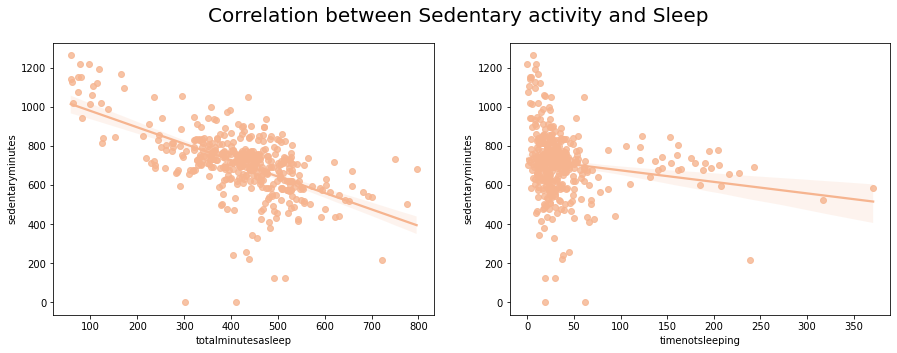

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Correlation between Sedentary activity and Sleep',fontsize=20)

sns.regplot(data=act_sleep_merge, x='totalminutesasleep', y='sedentaryminutes',ax=axes[0])
sns.regplot(data=act_sleep_merge, x='timenotsleeping', y='sedentaryminutes',ax=axes[1])

I also noticed a moderate positive correlation between calories spent and total steps and total distante.

<AxesSubplot:xlabel='totaldistance', ylabel='calories'>

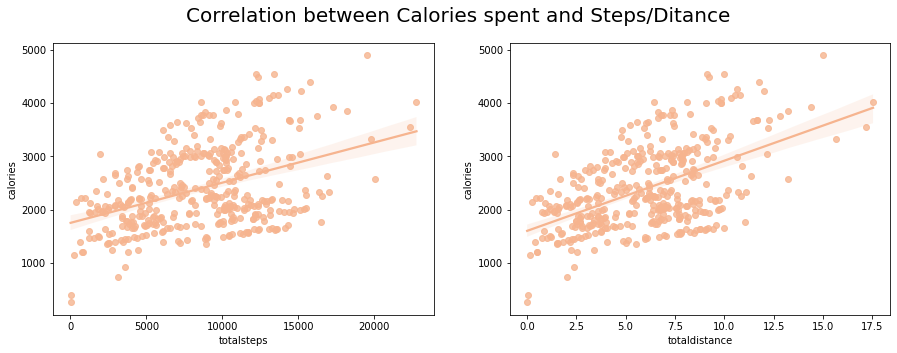

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Correlation between Calories spent and Steps/Ditance',fontsize=20)

sns.regplot(data=act_sleep_merge, x='totalsteps', y='calories', ax=axes[0])
sns.regplot(data=act_sleep_merge, x='totaldistance', y='calories', ax=axes[1])

<AxesSubplot:xlabel='veryactiveminutes', ylabel='calories'>

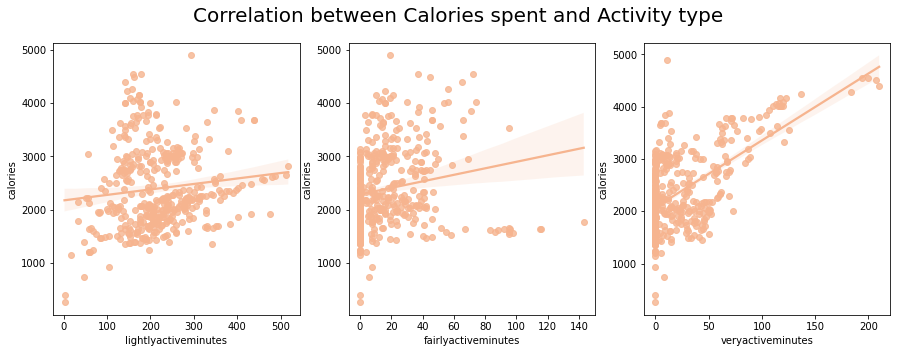

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Correlation between Calories spent and Activity type',fontsize=20)

sns.regplot(data=act_sleep_merge, x='lightlyactiveminutes', y='calories', ax=axes[0])
sns.regplot(data=act_sleep_merge, x='fairlyactiveminutes', y='calories', ax=axes[1])
sns.regplot(data=act_sleep_merge, x='veryactiveminutes', y='calories', ax=axes[2])

As expected, the more active the user, the more calories he spends daily.

Next I explored the hourly datasets, trying to get a better picture of the time window when the users were the most active. I noticed that the avarage user is more active during the time windows from 12-14h and 17-19h. The first time window could be attributed the physical movement due to their lunch hour, while the second one could be a combination of the communion back home or the actual time frame when the user workout.

<AxesSubplot:title={'center':'User Timeframe of Physical Activity'}, xlabel='hour', ylabel='averageintensity'>

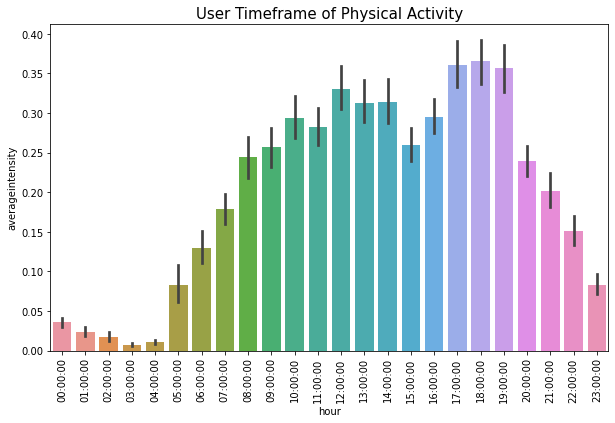

In [44]:
plt.figure(figsize=(10,6))
ax=plt.axes()
ax.set_title('User Timeframe of Physical Activity', fontsize=15)

plt.xticks(rotation=90)
sns.barplot(data = hourly_intensities, x="hour", y="averageintensity")

# Act

The avarage user of the FitBit tracker helps us get a decent picture of the consumer of smart devices to track fitness and health. It's an fairly active user, taking the recommended steps to be considered healthy and spending even more than the avarage time during workout.

By exploring the relationship between the variables gathered iun this survey, I noticed that users can improve graetly on more hours of sleep if they avoid taking too much time being sedentary. That could mean more time performing light activities during different time windows if they can.

Another straight forward relationship is the calories spent and the amount of calories burned. It was already something that I suspected, but having confirm that only nails the point of taking more steps during the day can improve the users calories deficit.

In summary, my recommendations include:
* **setting up a function that records the user usual habbits as they are before making any changes into the routine:** This feature will allow the BellaBeat app to make an indepth recording of the user behaviour so she can later set up goals she would like to achieve.
* **setting up goals with milestones:** for users trying to lose weight by burning more calories or having a better sleep, the app can active show our user if she is aproaching the daily recommendations in order to achieve her own set goals.
* **Setting up reminders and alerts in the app when the user has spent too much time not being active:** Altought this feature could be a little anoying, I belive is important for our commited  users to be alerted if their current routine could compromise their goals and or compromise their sleep quality.
